Assignment 5: Heart Disease Classification Challenge

### **Objective**
Apply all four classification methods we've learned to predict heart disease using a real medical dataset. Compare their performance and analyze which method works best for this healthcare application.

### **Dataset Overview**
You'll be working with the **Heart Disease UCI dataset** containing 13 clinical features to predict whether a patient has heart disease:

**Clinical Features:**
- **age**: Patient's age in years

- **sex**: Gender (Male/Female)

- **cp**: Chest pain type (typical angina, atypical angina, non-anginal, asymptomatic)

- **trestbps**: Resting blood pressure (mm Hg)

- **chol**: Serum cholesterol (mg/dl)

- **fbs**: Fasting blood sugar > 120 mg/dl (True/False)

- **restecg**: Resting electrocardiographic results

- **thalch**: Maximum heart rate achieved

- **exang**: Exercise induced angina (True/False)

- **oldpeak**: ST depression induced by exercise relative to rest

- **slope**: Slope of the peak exercise ST segment

- **ca**: Number of major vessels colored by fluoroscopy (0-3)

- **thal**: Thalassemia (normal, fixed defect, reversable defect)

**Target Variable:**
- **num**: Heart disease status (0 = healthy, 1 = has heart disease)

### **Assignment Tasks**
Complete the following tasks in order. Each task builds upon the previous ones:

**1. Data Exploration & Preprocessing**
- Load and examine the dataset structure

- Check for missing values and handle them appropriately

- Perform exploratory data analysis with at least 3 visualizations

- Potentially create new useful features

- Encode categorical variables (sex, cp, restecg, slope, thal)

- Split data into training and testing sets (80/20 split)

**2. Feature Analysis**
- Create correlation matrix heatmap to identify relationships

- Analyze class distribution (healthy vs. heart disease)

- Scale features for algorithms that require it

**3. Model Implementation**
Implement and train all four classification methods:
- **Logistic Regression**

- **Decision Tree**: Tune max_depth and min_samples_split

- **Random Forest**: Tune n_estimators and max_depth

- **Support Vector Machine**: Try both linear and RBF kernels, tune C

**4. Model Evaluation**
For each model, calculate and compare:
- Accuracy

- Confusion matrices

- Summarize results in a comparison table

### **Tips for Success**

**Data Preprocessing Tips:**
- Use `pd.get_dummies()` for categorical encoding

- Check for outliers in continuous variables

- Consider using `StandardScaler` for Logistic Regression and SVM

**Model Training Tips:**
- Start with default parameters, then tune systematically

- Use `train_test_split(stratify=y)` to maintain class balance

- Set `random_state=42` for reproducible results

# Evaluation functions

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, X_test, y_test, model_name, class_names=['No <3 Disease', '<3 Disease']):
    """
    Evaluates a classification model by printing a classification report
    and displaying a confusion matrix.
    """
    print(f"\n--- {model_name} Evaluation ---")
    y_pred = model.predict(X_test)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()

# Helper function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title,
                             feature_names=['X1', 'X2'], class_names=['Class 1', 'Class 2', 'Class 3'],
                             control_column=None, control_value=0, ax=None, figsize=(12, 6), samples=300,
                             x1_padding=0, x2_padding=0,
                             X_scaler=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    x1_range = np.linspace(X[feature_names[0]].min() - x1_padding, X[feature_names[0]].max() + x1_padding, samples)
    x2_range = np.linspace(X[feature_names[1]].min() - x2_padding, X[feature_names[1]].max() + x2_padding, samples)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

    if control_column is not None:
        predict_vals = np.c_[np.full(x1_mesh.size, control_value), x1_mesh.ravel(), x2_mesh.ravel()]
    else:
        predict_vals = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]

    if X_scaler is not None:
        predict_vals = X_scaler.transform(predict_vals)

    # Predict on the meshgrid
    Z = model.predict(predict_vals)
    Z = Z.reshape(x1_mesh.shape)

    # Plot the contour and training examples
    ax.contourf(x1_mesh, x2_mesh, Z, alpha=0.4, cmap='RdYlGn')
    scatter = ax.scatter(X[feature_names[0]], X[feature_names[1]], c=y, s=20, edgecolor='k', cmap='RdYlGn')

    ax.set_title(title)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.legend(handles=scatter.legend_elements()[0], labels=class_names)

    return ax

# Reading data

In [3]:
# Download latest version
import kagglehub
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")
dataset_path = "/".join((path, "heart_disease_uci.csv"))

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Path to dataset files: /kaggle/input/heart-disease-data


In [4]:
import pandas as pd
df = pd.read_csv(dataset_path)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Data visualization

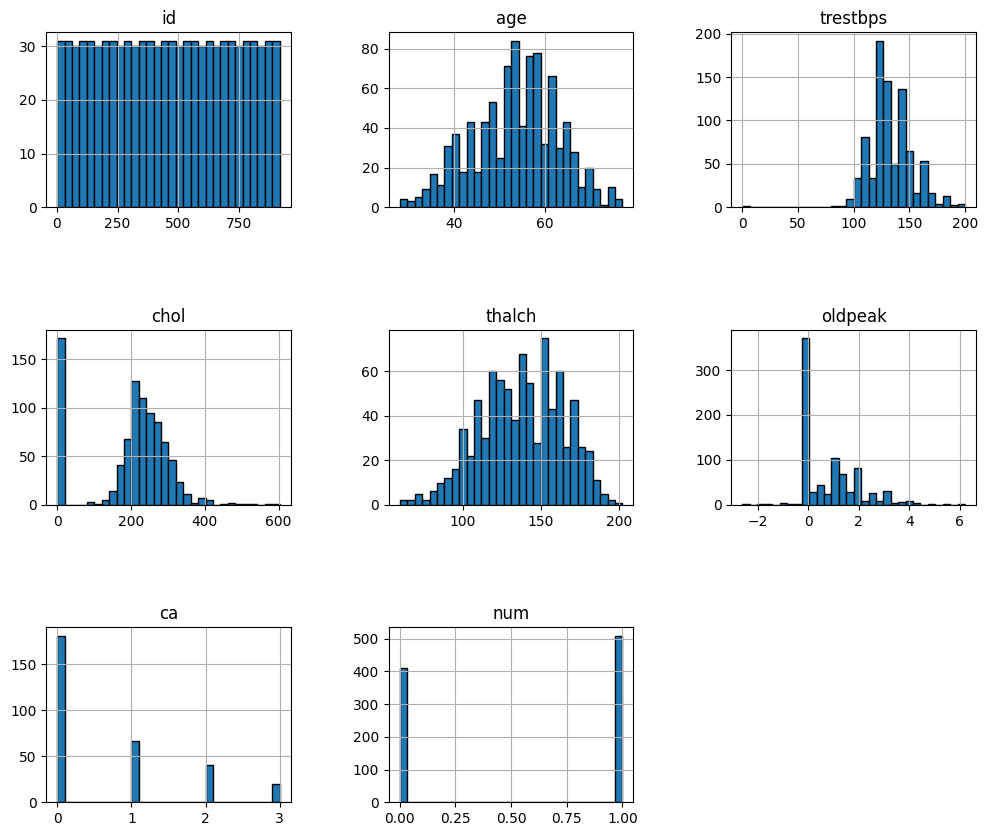

In [5]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

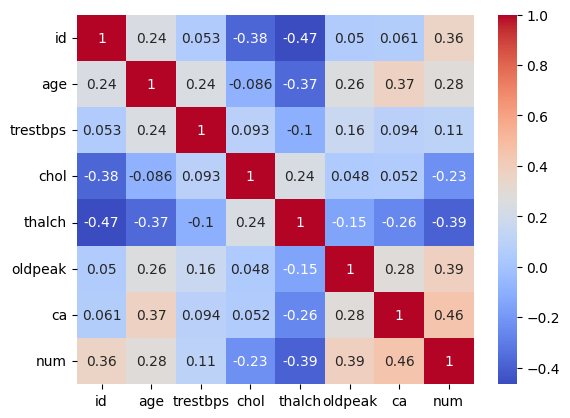

In [6]:
import seaborn as sns
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

# plot correlations
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

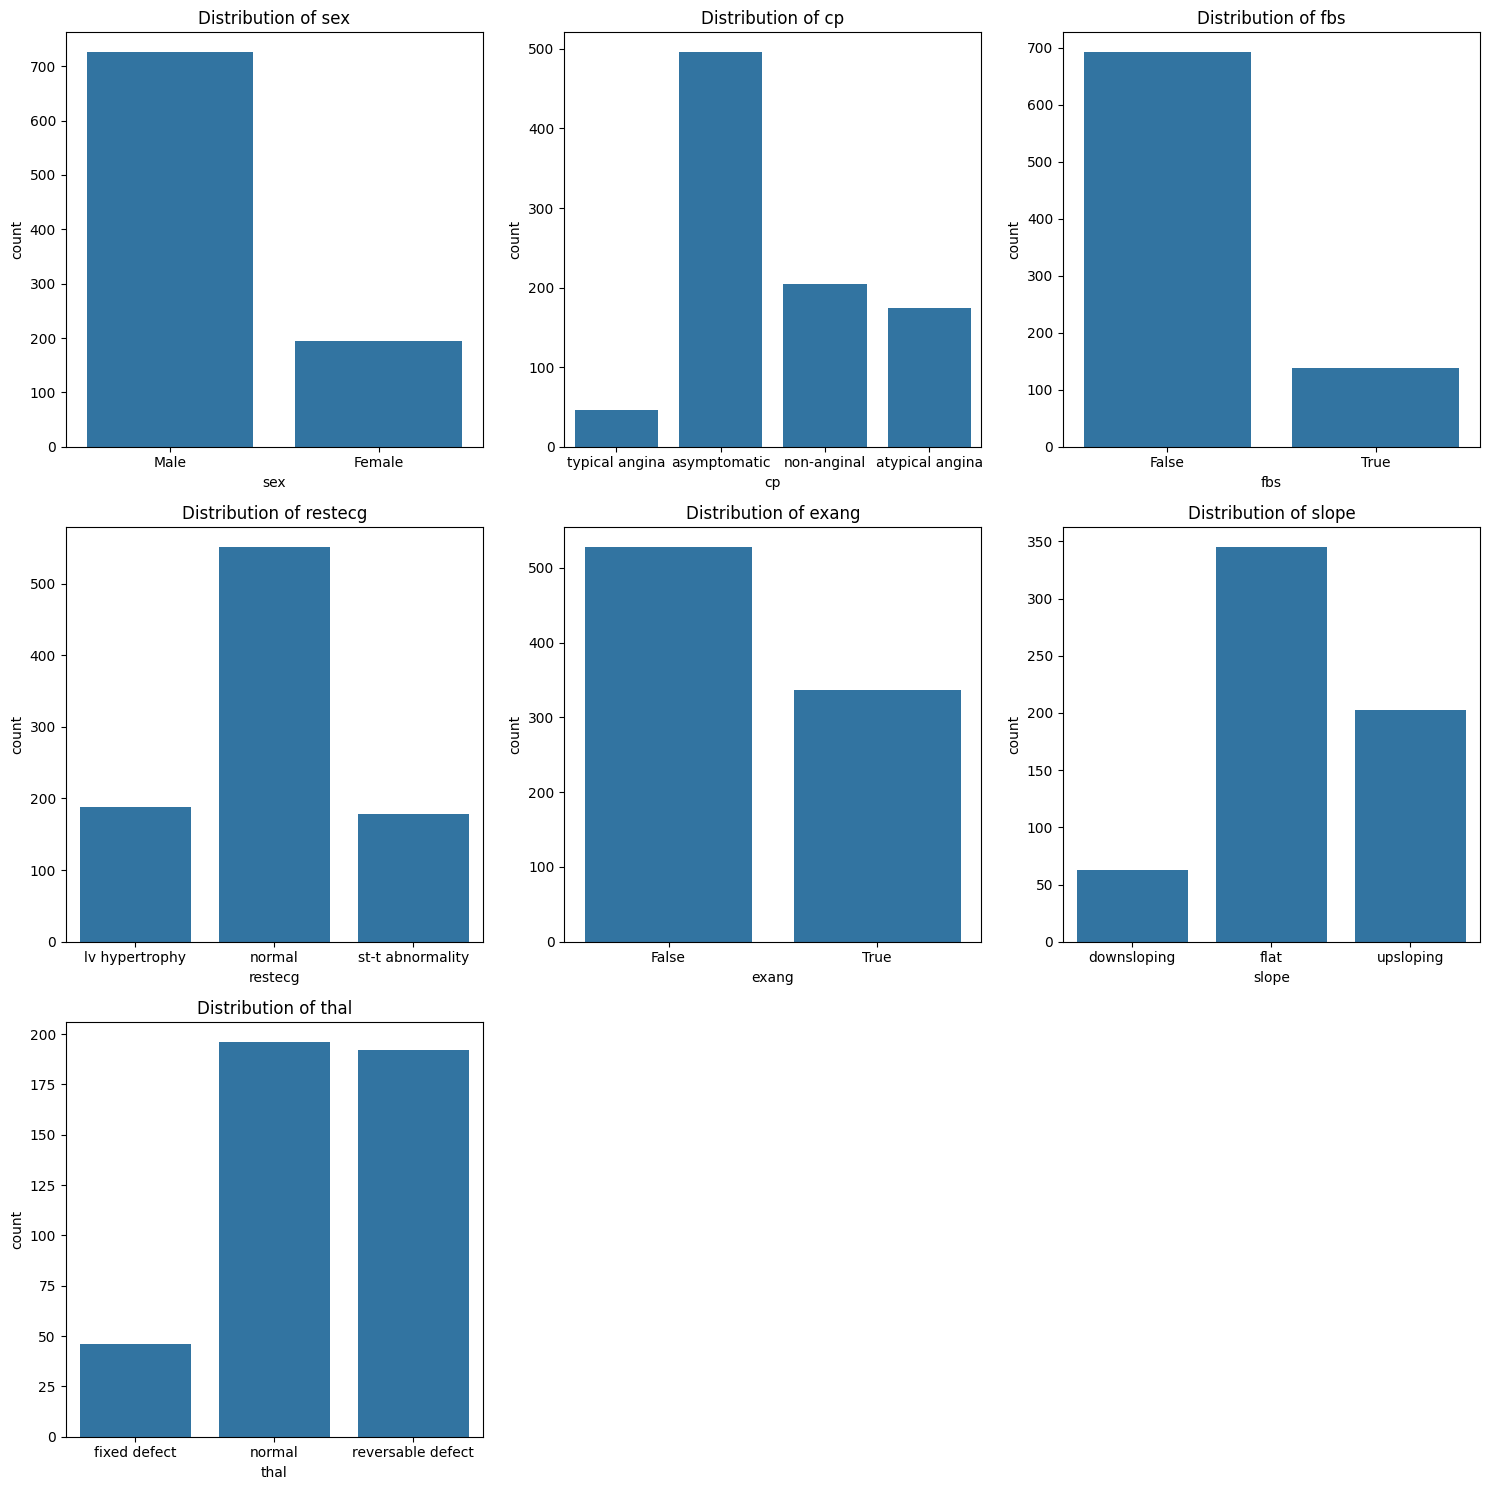

In [7]:
# Create count plots for the categorical features
categorical_cols = df.select_dtypes(exclude=['number', 'datetime']).columns.tolist()
# Exclude 'dataset' and 'age_range' as they have many unique values or have been visualized differently
cols_to_plot = [col for col in categorical_cols if col not in ['dataset', 'age_range', 'id']]

# Calculate the number of rows and columns for subplots
n_cols = 3
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows
for i, col in enumerate(cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Missing values

In [8]:
df_clean = df.copy()
df_clean

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
df.age.max()

77

In [10]:
#numeric columns

for col in ['trestbps', 'chol', 'oldpeak']:
    df_clean[col] = df_clean[col].fillna(df[col].median())
    print(col , df[col].median())

for col in ['thalch']:
    df_clean[col] = df_clean[col].fillna(df[col].mean())
    print(col , df[col].mean())

# many missing values, 0 is default
df_clean['ca'] = df_clean['ca'].fillna(0)

trestbps 130.0
chol 223.0
oldpeak 0.5
thalch 137.5456647398844


In [11]:
#categorical columns

for col in ['fbs', 'exang', 'restecg']:
    col_mode = df_clean[col].mode()[0]
    print(col_mode)
    df_clean[col] = df_clean[col].fillna(col_mode)

False
False
normal


/tmp/ipython-input-1520136117.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].fillna(col_mode)


In [12]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# Feature Engineering

In [ ]:
def cholesterol_group(chol):
    if chol < 200:
        return 0
    elif chol <= 239:
        return 1
    elif chol <= 299:
        return 2
    else:
        return 3

df_clean["chol_group"] = df_clean["chol"].apply(cholesterol_group)

In [ ]:
df_clean.head()

# Encoding categorical features

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

# Encoding some categorical features with one hot encoding
df_clean_encoded = pd.get_dummies(df_clean, columns=['dataset','cp','restecg', 'thal'], dtype=int)

# Encoding slope with a Label Encoder because it`s also a scalable feature
for col in ['sex', 'fbs', 'exang','slope']:
    df_clean_encoded[col] = label_encoder.fit_transform(df_clean_encoded[col])

# Feature Engineering based on domain knowledge and correlations

# Interaction between chest pain type and exercise induced angina
# Patients with asymptomatic chest pain and exercise induced angina might have a higher risk
df_clean_encoded['cp_asymptomatic_exang'] = df_clean_encoded['cp_asymptomatic'] * df_clean_encoded['exang']

# Interaction between oldpeak and slope
# Combined effect of ST depression and the slope of the ST segment during exercise
df_clean_encoded['oldpeak_slope'] = df_clean_encoded['oldpeak'] * df_clean_encoded['slope']

# Interaction between thal and chest pain type
# Different thal conditions combined with chest pain types could be significant
df_clean_encoded['thal_reversable_cp_asymptomatic'] = df_clean_encoded['thal_reversable defect'] * df_clean_encoded['cp_asymptomatic']
df_clean_encoded['thal_normal_cp_atypical'] = df_clean_encoded['thal_normal'] * df_clean_encoded['cp_atypical angina']

# Age-related features (optional, depending on further analysis)
# df_clean_encoded['age_oldpeak'] = df_clean_encoded['age'] * df_clean_encoded['oldpeak']
# df_clean_encoded['age_thalch'] = df_clean_encoded['age'] * df_clean_encoded['thalch']

df_clean_encoded.head()

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,...,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,thal_fixed defect,thal_normal,thal_reversable defect,cp_asymptomatic_exang,oldpeak_slope,thal_reversable_cp_asymptomatic,thal_normal_cp_atypical
0,1,63,1,145.0,233.0,1,150.0,0,2.3,0,...,1,0,0,1,0,0,0,0.0,0,0
1,2,67,1,160.0,286.0,0,108.0,1,1.5,1,...,1,0,0,0,1,0,1,1.5,0,0
2,3,67,1,120.0,229.0,0,129.0,1,2.6,1,...,1,0,0,0,0,1,1,2.6,1,0
3,4,37,1,130.0,250.0,0,187.0,0,3.5,0,...,0,1,0,0,1,0,0,0.0,0,0
4,5,41,0,130.0,204.0,0,172.0,0,1.4,2,...,1,0,0,0,1,0,0,2.8,0,1


In [17]:
df_clean_encoded

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,...,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,thal_fixed defect,thal_normal,thal_reversable defect,cp_asymptomatic_exang,oldpeak_slope,thal_reversable_cp_asymptomatic,thal_normal_cp_atypical
0,1,63,1,145.0,233.0,1,150.000000,0,2.3,0,...,1,0,0,1,0,0,0,0.0,0,0
1,2,67,1,160.0,286.0,0,108.000000,1,1.5,1,...,1,0,0,0,1,0,1,1.5,0,0
2,3,67,1,120.0,229.0,0,129.000000,1,2.6,1,...,1,0,0,0,0,1,1,2.6,1,0
3,4,37,1,130.0,250.0,0,187.000000,0,3.5,0,...,0,1,0,0,1,0,0,0.0,0,0
4,5,41,0,130.0,204.0,0,172.000000,0,1.4,2,...,1,0,0,0,1,0,0,2.8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,127.0,333.0,1,154.000000,0,0.0,3,...,0,0,1,0,0,0,0,0.0,0,0
916,917,62,1,130.0,139.0,0,137.545665,0,0.5,3,...,0,0,1,0,0,0,0,1.5,0,0
917,918,55,1,122.0,223.0,1,100.000000,0,0.0,3,...,0,0,1,1,0,0,0,0.0,0,0
918,919,58,1,130.0,385.0,1,137.545665,0,0.5,3,...,1,0,0,0,0,0,0,1.5,0,0


# Correlations

In [18]:
# we`ll make a correlation top of the features with the target feature ( num )
numeric_features = df_clean_encoded.select_dtypes(include=['int64','float64']).columns
categorical_features = df_clean_encoded.select_dtypes(include=['object']).columns
print("Numeric features: ")
print(numeric_features)
print("Categorical features:")
print(categorical_features)


Numeric features: 
Index(['id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang',
       'oldpeak', 'slope', 'ca', 'num', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect',
       'cp_asymptomatic_exang', 'oldpeak_slope',
       'thal_reversable_cp_asymptomatic', 'thal_normal_cp_atypical'],
      dtype='object')
Categorical features:
Index([], dtype='object')


In [19]:


# Calculate correlations with the target variable 'num'
correlations_with_target = df_clean_encoded.corr()['num'].sort_values(ascending=False)

# Display the correlations
print("Correlations with the target variable 'num':")
display(correlations_with_target)

Correlations with the target variable 'num':


,num
num,1.000000
cp_asymptomatic,0.515736
cp_asymptomatic_exang,0.449906
exang,0.433605
oldpeak,0.366138
id,0.356086
thal_reversable_cp_asymptomatic,0.311938
sex,0.307284
dataset_Switzerland,0.301614
age,0.282700


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Including newly engineered features
X = df_clean_encoded.copy()
y = df_clean['num']

# Using f_regression as the scoring function for regression tasks
selector = SelectKBest(score_func=f_regression, k='all') # Select all features to see their scores
X_selected = selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("\nFeature Importance Scores:")
print(feature_scores)

selected_features = X.columns[selector.get_support()]
# print("\nSelected Features:")
# print(selected_features)

# Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = df_clean_encoded[['oldpeak','exang','cp_asymptomatic']]
y = df_clean_encoded['num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression

## Single predictor model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# Select a single feature for the single predictor model (e.g., 'thalch')
X_train_single_predictor = X_train[['oldpeak']]
X_test_single_predictor = X_test[['oldpeak']]

# Scale the selected feature
scaler = StandardScaler()
X_train_single_predictor_scaled = scaler.fit_transform(X_train_single_predictor)
X_test_single_predictor_scaled = scaler.transform(X_test_single_predictor)

print("Shape of X_train_balance_scaled:", X_train_single_predictor_scaled.shape)
print("Shape of y_train:", y_train.shape)

In [ ]:
# Logistic regression with a single predictor
single_predictor_logistic_model = LogisticRegression()
single_predictor_logistic_model.fit(X_train_single_predictor_scaled, y_train)

In [ ]:
single_predictor_intercept = single_predictor_logistic_model.intercept_[0]
single_predictor_coef = single_predictor_logistic_model.coef_[0][0]

print("Single predictor logistic regression model:")
print(f"Intercept: {single_predictor_intercept:.6f}")
print(f"Coefficient: {single_predictor_coef:.6f}")

In [ ]:
evaluate_model(single_predictor_logistic_model, X_test_single_predictor_scaled, y_test, "Single Predictor LR")

## Multiple predictors model

In [ ]:
scaler_multi = StandardScaler()
X_train_multi_scaled = scaler_multi.fit_transform(X_train)
X_test_multi_scaled = scaler_multi.transform(X_test)

multiple_predictor_logistic_model = LogisticRegression(random_state=42)
multiple_predictor_logistic_model.fit(X_train_multi_scaled, y_train)

feature_names = ['exang', 'oldpeak', 'cp_asymptomatic']
multiple_predictor_intercept = multiple_predictor_logistic_model.intercept_[0]
multiple_predictor_coefficients = multiple_predictor_logistic_model.coef_[0]

coef_table = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': multiple_predictor_coefficients
})

print("Multiple predictor logistic regression model (with scaled features):")
print(f"\\nIntercept: {multiple_predictor_intercept:.6f}")
print(coef_table)

In [ ]:
evaluate_model(multiple_predictor_logistic_model, X_test_multi_scaled, y_test, "Multiple Predictor LR")

## Visualization

In [ ]:
plt.figure(figsize=(15, 5))

# Plot 1: Single predictor model
plt.subplot(1, 3, 1)

oldpeak_range = np.linspace(X_train_single_predictor.min(), X_train_single_predictor.max(), 300).reshape(-1, 1)
scaled_oldpeak_range = scaler.transform(oldpeak_range)
probabilities = single_predictor_logistic_model.predict_proba(scaled_oldpeak_range)[:, 1]

# Plot data points
for i, (color, label) in enumerate([('blue', 'No Heart Disease'), ('red', 'Heart Disease')]):
    mask = y_train == i
    plt.scatter(X_train_single_predictor[mask], y_train[mask] + np.random.normal(0, 0.02, sum(mask)),
                c=color, alpha=0.6, label=label)

plt.plot(oldpeak_range, probabilities, color='green', linewidth=3,
         label='Predicted Probability')

# Decision boundary
decision_boundary_oldpeak = -single_predictor_intercept / single_predictor_coef
boundary_val = scaler.inverse_transform([[decision_boundary_oldpeak]])[0][0]
plt.axvline(x=boundary_val, color='purple', linestyle=':', linewidth=2,
            label=f'50% Prob. at {boundary_val:.2f}')

plt.xlabel('Oldpeak')
plt.ylabel('Probability of Heart Disease')
plt.title('Logistic Regression Decision Boundary\n(Single Predictor: Oldpeak)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

# Plot 2: Multiple predictor model by cp_asymptomatic status
plt.subplot(1, 3, 2)

mean_age = np.mean(X_train['exang'])

# Generate probability curves for cp_asymptomatic and non-cp_asymptomatic
prob_curves = {}
for asympt_status, (color, label) in [(1, ('orange', 'CP Asymptomatic')), (0, ('blue', 'Non-CP Asymptomatic'))]:
    X_pred = np.column_stack([np.full(300, asympt_status), oldpeak_range.flatten(), np.full(300, mean_age)])
    X_pred_scaled = scaler_multi.transform(X_pred)
    prob_curves[asympt_status] = multiple_predictor_logistic_model.predict_proba(X_pred_scaled)[:, 1]

    # Plot data points
    mask = X_train['cp_asymptomatic'] == asympt_status
    plt.scatter(X_train.loc[mask, 'oldpeak'],
                y_train.loc[mask] + np.random.normal(0, 0.02, sum(mask)),
                alpha=0.6, color=color, label=label)

    # Plot probability curve
    dark_color = 'darkorange' if asympt_status == 1 else 'darkblue'
    plt.plot(oldpeak_range, prob_curves[asympt_status], color=dark_color,
             linewidth=3, label=f'{label} Probability')

    # Decision boundary
    boundary_idx = np.argmin(np.abs(prob_curves[asympt_status] - 0.5))
    boundary_oldpeak = oldpeak_range[boundary_idx][0]
    plt.axvline(x=boundary_oldpeak, color=dark_color, linestyle=':', linewidth=2,
                label=f'{label} 50% at {boundary_oldpeak:.2f}')

plt.xlabel('Oldpeak')
plt.ylabel('Probability of Heart Disease')
plt.title('Multiple Predictor Model:\nOldpeak Effect by CP Asymptomatic Status')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.metrics import accuracy_score

# Create and fit the decision tree
# We'll use a max_depth of 5 for a balance between performance and interpretability
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

In [ ]:
evaluate_model(dt_model, X_test, y_test, "Decision Tree (max depth = 5)", class_names=['No Heart Disease', 'Heart Disease'])

In [ ]:
%matplotlib inline

dt_model = DecisionTreeClassifier(random_state=42, max_depth=3) # small depth for easier visualization
dt_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=['oldpeak', 'exang', 'cp_asymptomatic'],
          class_names=['No Heart Disease', 'Heart Disease'],
          filled=True,
          impurity=True,
          precision=2,
          fontsize=12)
plt.title("Decision Tree Structure for Heart Disease Prediction")
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

X_cp_asymptomatic = X[X['cp_asymptomatic'] == 1]
y_cp_asymptomatic = y[X['cp_asymptomatic'] == 1]
plot_decision_boundaries(X_cp_asymptomatic, y_cp_asymptomatic, dt_model, "Decision Tree (cp_asymptomatics)",
                         feature_names=['oldpeak', 'exang'], class_names=['No Heart Disease', 'Heart Disease'], control_column='cp_asymptomatic', control_value=1,
                         ax=axes[0], x1_padding=2, x2_padding=4)

X_non_cp_asymptomatic = X[X['cp_asymptomatic'] == 0]
y_non_cp_asymptomatic = y[X['cp_asymptomatic'] == 0]
plot_decision_boundaries(X_non_cp_asymptomatic, y_non_cp_asymptomatic, dt_model, "Decision Tree (Non-cp_asymptomatics)",
                         feature_names=['oldpeak', 'exang'], class_names=['No Heart Disease', 'Heart Disease'], control_column='cp_asymptomatic', control_value=0,
                         ax=axes[1], x1_padding=2, x2_padding=4)
plt.show()

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create and fit random forest
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42,
    max_depth=None,        # Let trees grow fully
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True         # Use bootstrap sampling
)

# We'll reuse the same train/test split from the decision tree
rf_model.fit(X_train, y_train)

In [ ]:
evaluate_model(rf_model, X_test, y_test, "Random Forest (100 trees)", class_names=['No Heart Disease', 'Heart Disease'])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


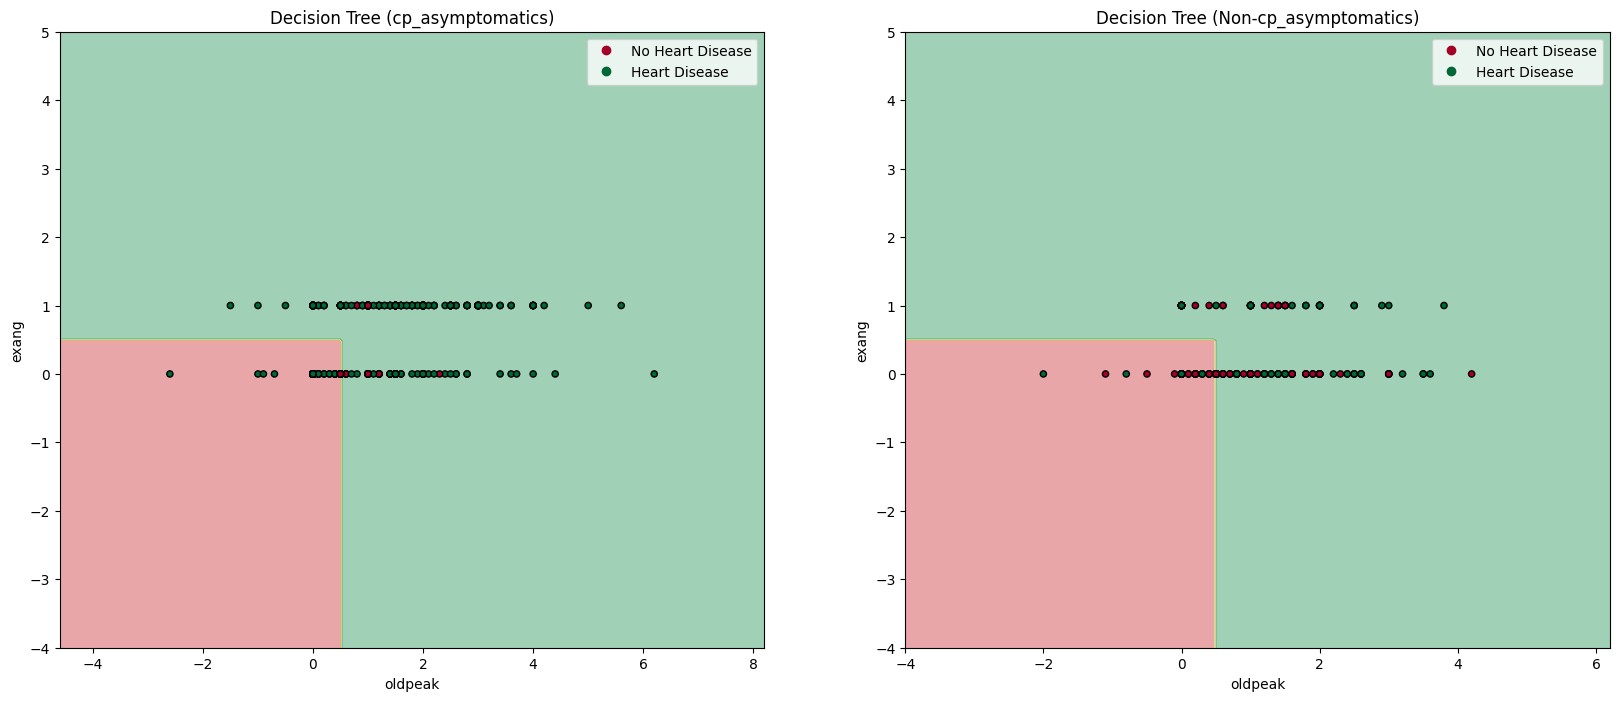

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

X_cp_asymptomatic = X[X['cp_asymptomatic'] == 1]
y_cp_asymptomatic = y[X['cp_asymptomatic'] == 1]
plot_decision_boundaries(X_cp_asymptomatic, y_cp_asymptomatic, rf_model, "Decision Tree (cp_asymptomatics)",
                         feature_names=['oldpeak', 'exang'], class_names=['No Heart Disease', 'Heart Disease'], control_column='cp_asymptomatic', control_value=1,
                         ax=axes[0], x1_padding=2, x2_padding=4)

X_non_cp_asymptomatic = X[X['cp_asymptomatic'] == 0]
y_non_cp_asymptomatic = y[X['cp_asymptomatic'] == 0]
plot_decision_boundaries(X_non_cp_asymptomatic, y_non_cp_asymptomatic, rf_model, "Decision Tree (Non-cp_asymptomatics)",
                         feature_names=['oldpeak', 'exang'], class_names=['No Heart Disease', 'Heart Disease'], control_column='cp_asymptomatic', control_value=0,
                         ax=axes[1], x1_padding=2, x2_padding=4)
plt.show()

# SVM Model

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# SVMs are sensitive to feature scales, so we'll standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# We'll use the RBF kernel, which is a good default
svm_model = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)


--- SVM (RBF) Evaluation ---
Classification Report:
               precision    recall  f1-score   support

No <3 Disease       0.83      0.67      0.74        82
   <3 Disease       0.77      0.89      0.83       102

     accuracy                           0.79       184
    macro avg       0.80      0.78      0.79       184
 weighted avg       0.80      0.79      0.79       184



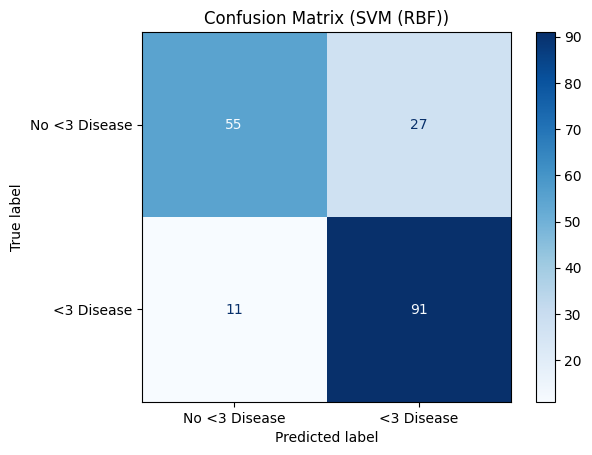

In [ ]:
evaluate_model(svm_model, X_test_scaled, y_test, "SVM (RBF)")

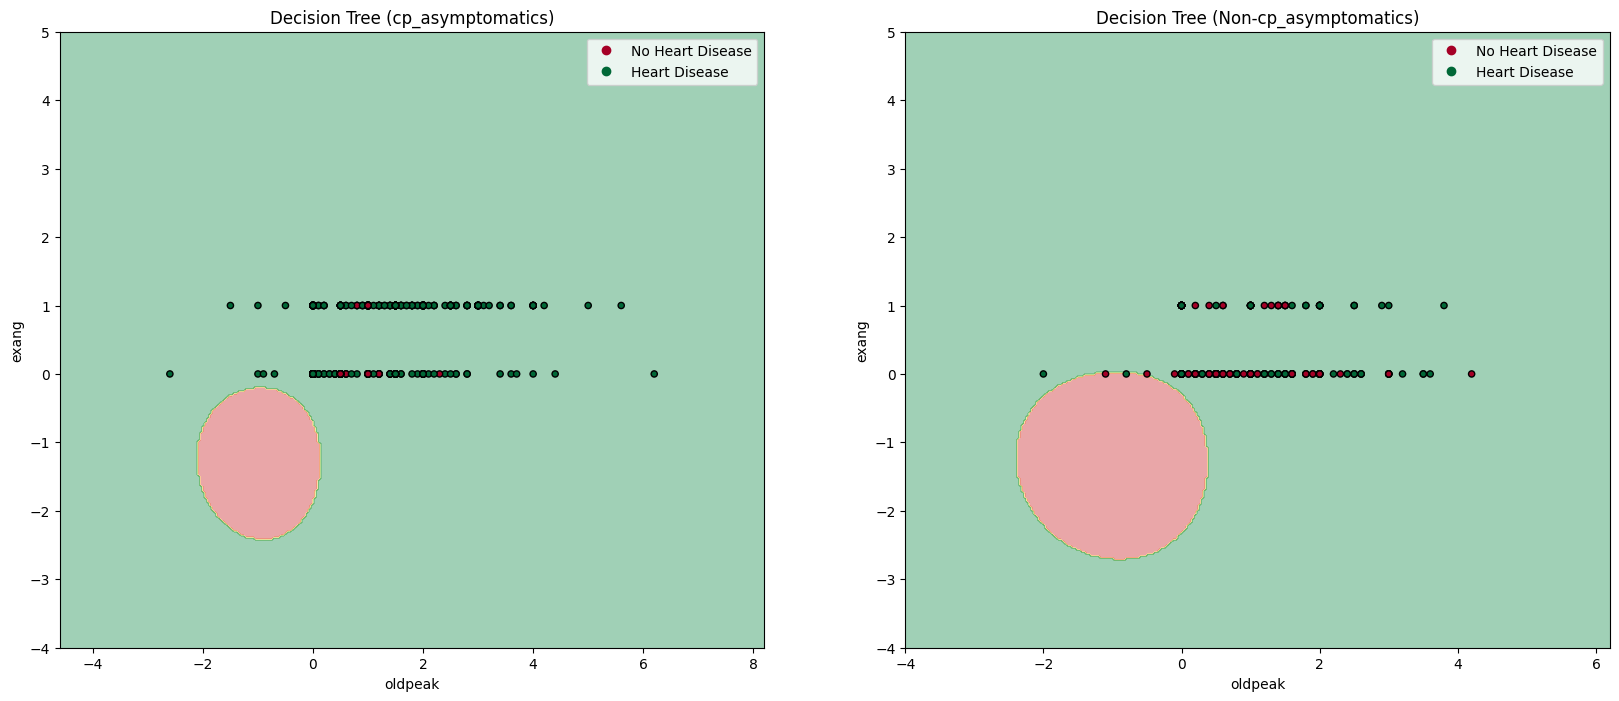

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

X_cp_asymptomatic = X[X['cp_asymptomatic'] == 1]
y_cp_asymptomatic = y[X['cp_asymptomatic'] == 1]
plot_decision_boundaries(X_cp_asymptomatic, y_cp_asymptomatic, svm_model, "Decision Tree (cp_asymptomatics)",
                         feature_names=['oldpeak', 'exang'], class_names=['No Heart Disease', 'Heart Disease'], control_column='cp_asymptomatic', control_value=1,
                         ax=axes[0], x1_padding=2, x2_padding=4)

X_non_cp_asymptomatic = X[X['cp_asymptomatic'] == 0]
y_non_cp_asymptomatic = y[X['cp_asymptomatic'] == 0]
plot_decision_boundaries(X_non_cp_asymptomatic, y_non_cp_asymptomatic, svm_model, "Decision Tree (Non-cp_asymptomatics)",
                         feature_names=['oldpeak', 'exang'], class_names=['No Heart Disease', 'Heart Disease'], control_column='cp_asymptomatic', control_value=0,
                         ax=axes[1], x1_padding=2, x2_padding=4)
plt.show()